In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
dataset = pd.read_excel('/content/drive/MyDrive/capstone_minatku/Book1.xlsx', skiprows=1)

In [14]:
dataset.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,orientation,race,voted,married,familysize,uniqueNetworkLocation,country,source,major,Unnamed: 93
0,3,4,3,1,1,4,1,3,5,5,...,1,1,2,1,1,1,US,2,NaN,NaN
1,1,1,2,4,1,2,2,1,5,5,...,3,4,1,2,3,1,US,1,Nursing,NaN
2,2,1,1,1,1,1,1,1,4,1,...,1,4,2,1,1,1,US,1,NaN,NaN
3,3,1,1,2,2,2,2,2,4,1,...,1,1,2,1,1,1,CN,0,NaN,NaN
4,4,1,1,2,1,1,1,2,5,5,...,3,1,2,1,4,1,PH,0,education,NaN


#Remove unwanted fatures and nan val

In [15]:
## Hapus semua kolom yang tidak perlu ('introelapse' sampai 'source' + 'Unnamed: 93')
del_cols = list(dataset.columns)
del_cols = del_cols[del_cols.index('introelapse'):del_cols.index('surveyelapse') + 1] + del_cols[del_cols.index('VCL1'):-2]
del_cols.append('Unnamed: 93') ## Misah karena sebelum 'Unnamed: 93' ada 'major'
dataset.drop(columns = del_cols, inplace = True)
dataset.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
0,3,4,3,1,1,4,1,3,5,5,...,4,2,3,2,7,5,6,6,5,NaN
1,1,1,2,4,1,2,2,1,5,5,...,5,7,4,7,6,6,4,6,1,Nursing
2,2,1,1,1,1,1,1,1,4,1,...,4,3,7,5,1,7,1,5,3,NaN
3,3,1,1,2,2,2,2,2,4,1,...,2,7,7,5,7,6,2,3,6,NaN
4,4,1,1,2,1,1,1,2,5,5,...,7,1,7,4,7,7,5,4,7,education


In [16]:
## Drop semua nilai NaN di kolom 'major'
dataset.dropna(subset = ['major'], inplace = True)
dataset.head(n = 5)

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
1,1,1,2,4,1,2,2,1,5,5,...,5,7,4,7,6,6,4,6,1,Nursing
4,4,1,1,2,1,1,1,2,5,5,...,7,1,7,4,7,7,5,4,7,education
5,3,5,1,3,1,5,3,4,4,5,...,2,3,5,3,6,7,5,2,1,Literature
6,1,4,1,4,1,4,1,2,4,4,...,2,5,5,3,6,2,4,7,2,Math
7,5,1,2,2,2,1,2,1,4,4,...,6,5,4,6,3,7,5,5,3,mathematics and science


In [17]:
dataset.describe()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
count,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,...,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000
mean,2.602205,2.094141,1.774523,2.213627,1.712146,2.209842,1.986833,1.965273,3.476300,3.312047,...,4.792133,3.857472,5.604016,4.026169,5.790816,4.447828,5.664582,3.077683,5.085418,2.871461
std,1.356923,1.223377,1.140146,1.322344,1.042910,1.270200,1.169640,1.172642,1.319907,1.372292,...,1.850657,1.862808,1.512813,1.923082,1.330561,1.952121,1.426868,1.854339,1.601577,1.756943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,...,3.000000,2.000000,5.000000,2.000000,5.000000,3.000000,5.000000,1.000000,4.000000,1.000000
50%,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4.000000,4.000000,...,5.000000,4.000000,6.000000,4.000000,6.000000,5.000000,6.000000,3.000000,5.000000,2.000000
75%,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,...,6.000000,5.000000,7.000000,5.000000,7.000000,6.000000,7.000000,5.000000,6.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


#Data Cleaning for count labels

In [18]:
import os
import random
import re
import string

In [19]:
#lowercase all labels
lower = [str(i).lower() for i in dataset['major']]

In [20]:
 #preprocessed all labels delete unwanted value
 removed =[]
 stopword = ['na','no','none','nil','yes','ge', 'me', 'aa','undecided','not sure',
             'i dont know','nothing','tesl','comm','unknown','i dont know yet', 'no idea',
             'nope','unsure','none yet','mbbs','other','hdfs','general studies'
             '21', 'non', 'ba', 'idk', 'xx', 'fbi', 'pr', 'hrm', 'cad', 'com', 'aas',
             'hr', 'bba', 'ota', 'nne', 'ecu', 'med', 'pha', 'pt', 'ir', 'acc',
             'rhs', 'ust', '22', 'mis', 'ucf', 'psy', 'bsn', '932', 'eg', 'asl', 'hit',
             'ux', 'uav', 'â²z', '1st', 'ict', 'cpa', 'ibm', 'ggg', 'ems', 'cs', 'bus',
             'mpa', 'laa', 'htm', 'low', 'ma', 'ee', 'r n', 'eee', 're', 'cit', 'ged', 'eng',
             'usp', 'kl', 'md', 'dms', 'srt', 'ece', 'mph', 'mrc', 'vet', 'phd', 'crj', 'fu',
             'cj', 'ca', 'ler', 'bgs', 'sts', 'bbm', 'eco', 'cis', 'i t', 'abs', 'ect', 'bds',
             'lab', 'sac', 'ot', 'pta', 'bfa', 'pe', 'ag', 'ips', 'emt', 'kin', 'on',
             'lex', 'bpa', 'bse', 'dd', 'deu', 'rn', 'msc', 'unm', 'sex', 'lae', 'ec', 'hm',
             'bca', 'nlp', 'rtf', 'cna', 'io', 'fcs', 'eet', 'lol', 'bis', 'mft', 'si',
             'gs', 'ilr', 'cbe', 'icm', 'rt', 'lax', 'vfx', '55', 'tv', 'hes', 'pcc', 'gis',
             'ibs', 'cse', 'gen', 'huh', 'hca', 'gb', 'ai', 'ise', 'rh', '50', 'lpn', 'bom',
             'bst', 'bee', 'esl', 'apk', 'abm', 'nn', 'phy', 'bsc', 'ed', 'hod', 'slp', 'utt',
             'shs', 'ppe', 'n a', 'dnp', 'hk', 'nun', 'how', 'mse', 'sw', 'uxd', 'ses', 'â€“',
             'mkt', 'war', 'bm', 'hpe', 'buh', 'lah', 'aoj', '10', 'fag', 'prm', 'car', 'lcc',
             'hsa', 'soc', 'edu', 'mls', 'msw', 'its', 'f b', 'all', '304', 'bs', 'et', 'bib',
             'csd', '42', 'jhv', '46', 'tle','bra', 'idn', 'bhm', 'uh', '81', 'hsp', 'ras',
             'ids', 'ce', 'nba', 'ite','buts', 'tech', 'arch', 'fire', 'undeclared', 'general'
             'chef', 'econ','poop', 'tour', 'what', 'army', 'auto', 'cook', 'rotc',
             'full', 'pych', 'blis', 'bece', 'csim', 'cepe', 'fycs', 'blah', 'arte', 'matj',
             'bbit', 'open', 'golf', 'cmhc', 'selu', 'magh', 'idst', 'ieti', 'adpr', 'food',
             'tefl', 'jour', 'ucla', 'coms', 'good', 'hrwd', 'bcom', 'bsba', 'succ', 'psyc',
             'slhs', 'bhpe', 'b sc', 'busn', 'b ed', 'hvac', 'nã£o', 'duke',  '2323',
             '3659', '1575', 'acct', 'seem', 'eecs', 'wwii', 'chem', 'kine', 'duno',
             '1578', 'weed', 'hrir', 'stat', 'artl', '1212', 'uitm', 'i dk', 'mlis', 'umuc',
             'accy', 'both', 'chad', 'mcom', 'idek', 'oshe', 'test', 'stem', 'bafs', 'hrmn',
             'cdfs', 'rtvf', 'mgmt', 'nien', 'sdfg', 'nice', 'dogs', 'host', '1056', 'civi',
             'shop', 'cota', 'ncaa', 'bite', 'mech', 'cafs', 'diet', 'pscm', 'ocpt', 'bmcc',
             'huyt', 'yoga', 'nail', 'cjhs', 'dota', 'mice', 'osha', '1589', 'ifsm', '1602',
             'cntt', 'txmd', 'tvet', 'artd', 'pepe', 'care', 'engg']
 for text in lower:
  text = text.strip()
  text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
  text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
  text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
  text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
  text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
  if len(text)>1:
    #remove stopword
    if text not in stopword:
      #remove digit value
      if text.isdigit() == False:
        removed.append(text)

In [21]:
#check small word
smallword =[]
knew =['art','it','law','mba']
for i in removed:
  if len(i)<=4:
    if i not in smallword:
     smallword.append(i)
print(smallword)

['math', 'art', 'it', 'law', 'mba', 'film', 'arts', 'chef', 'flim', 'bio']


In [22]:
lower_labels = pd.DataFrame(removed)

In [23]:
def sort_list(list1, list2):
    zipped_pairs = zip(list2, list1)
    z = [x for _, x in sorted(zipped_pairs,reverse=True)]

    return z

In [24]:
unique_labels,counts=np.unique(np.array(removed), return_counts=True)

sorted_uniq_labels = sort_list(unique_labels,counts)

print(len(sorted_uniq_labels))
print(sorted_uniq_labels[:10])


1355
['psychology', 'english', 'business', 'nursing', 'education', 'biology', 'civil engineering', 'computer science', 'engineering', 'accounting']


In [27]:
# unique_labels_tupple[1:4]

#data distribution before relabeling

<Axes: ylabel='0'>

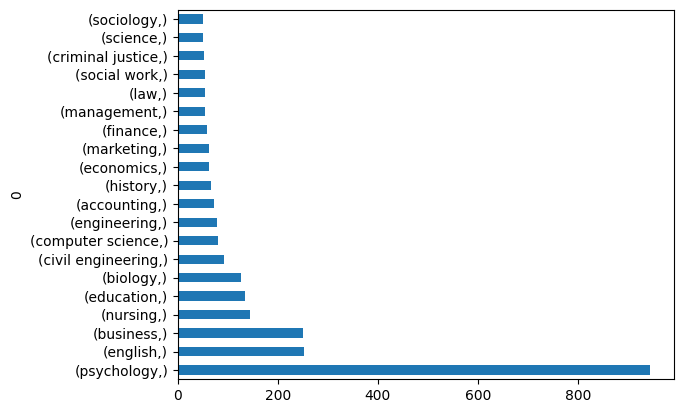

In [28]:
lower_labels.value_counts()[:20].plot(kind='barh')

<Axes: ylabel='0'>

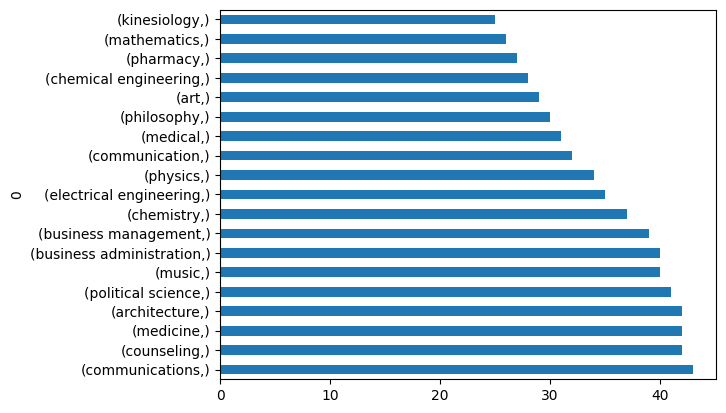

In [29]:
lower_labels.value_counts()[21:40].plot(kind='barh')

<Axes: ylabel='0'>

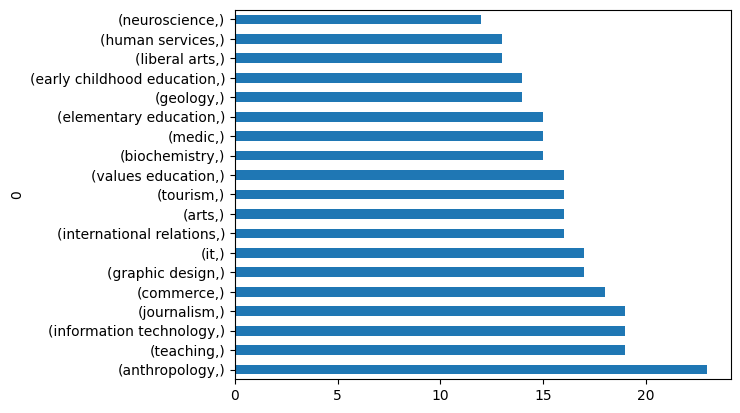

In [30]:
lower_labels.value_counts()[41:60].plot(kind='barh')

<Axes: ylabel='0'>

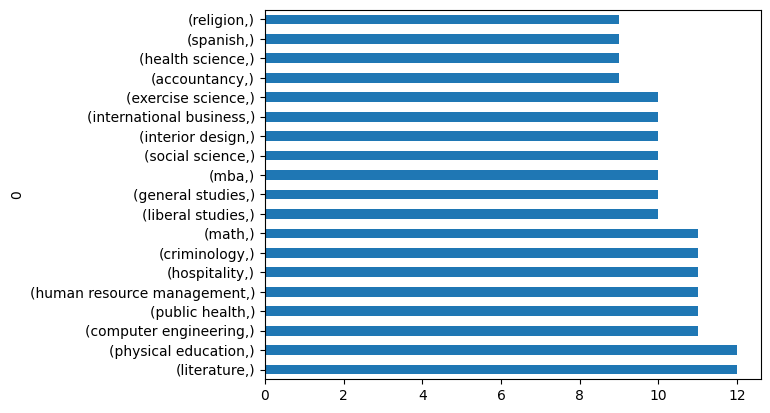

In [31]:
lower_labels.value_counts()[61:80].plot(kind='barh')

<Axes: ylabel='0'>

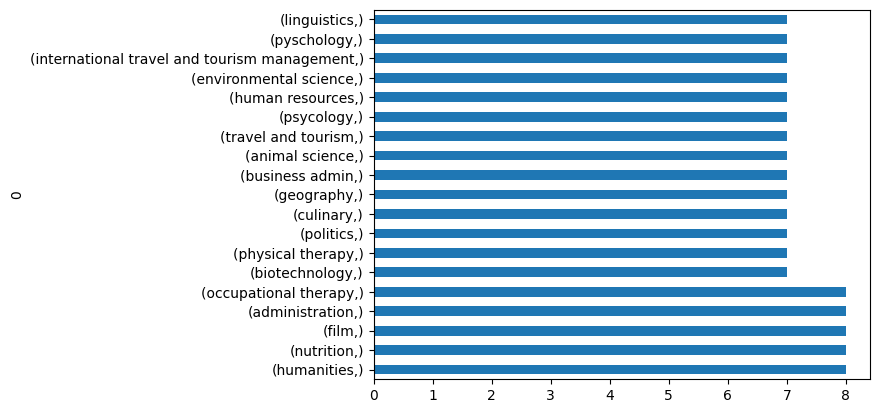

In [32]:
lower_labels.value_counts()[81:100].plot(kind='barh')

In [34]:
# lower_labels.value_counts()[11000:11020].plot(kind='barh')

In [37]:
# lower_labels.value_counts()[11042:].plot(kind='barh')

In [38]:
len(lower_labels)

5894

In [39]:
total = sum(lower_labels.value_counts()[1:150])
print(total)

3451


In [40]:
preprocessed = [[i] for i in removed]

In [41]:
preprocessed[:10]

[['nursing'],
 ['education'],
 ['literature'],
 ['math'],
 ['mathematics and science'],
 ['family resource management'],
 ['counselling'],
 ['business'],
 ['communication'],
 ['information technology']]

In [42]:
#Word2Vec

#word2vec


In [43]:
from gensim.models import Word2Vec
labels = dataset['major']
model = Word2Vec(preprocessed, min_count=5)

In [46]:
# print(len(model.wv.vocab))

In [47]:
model.wv.most_similar("science")

[('elementary education', 0.2122785449028015),
 ('human resource management', 0.19188855588436127),
 ('human services', 0.16693152487277985),
 ('international travel and tourism management', 0.16677328944206238),
 ('english', 0.15923377871513367),
 ('communication', 0.15619252622127533),
 ('international relations', 0.1550060659646988),
 ('business', 0.1528114527463913),
 ('information technology', 0.14976413547992706),
 ('philosophy', 0.14474642276763916)]

In [48]:
model.wv.most_similar("psychology")

[('liberal studies', 0.2897421419620514),
 ('animal science', 0.2295033037662506),
 ('social work', 0.21883943676948547),
 ('accounting', 0.21617142856121063),
 ('computer engineering', 0.20441339910030365),
 ('business management', 0.19543619453907013),
 ('elementary education', 0.17216654121875763),
 ('information technology', 0.1691875159740448),
 ('electrical engineering', 0.15161024034023285),
 ('philosophy', 0.14176106452941895)]

In [49]:
model.wv.most_similar("engineering")

[('music', 0.2853359878063202),
 ('medic', 0.23983338475227356),
 ('human resources', 0.21086272597312927),
 ('french', 0.2057950645685196),
 ('business', 0.19912061095237732),
 ('journalism', 0.190286785364151),
 ('physiology', 0.17296291887760162),
 ('tourism', 0.17233821749687195),
 ('nutrition', 0.16806545853614807),
 ('graphic design', 0.16682331264019012)]

In [50]:
model.wv.most_similar("art")

[('design', 0.2598475515842438),
 ('commerce', 0.2227497696876526),
 ('human resource', 0.21763727068901062),
 ('theology', 0.20226357877254486),
 ('medic', 0.17656247317790985),
 ('business admin', 0.1447417140007019),
 ('communication', 0.1445944905281067),
 ('history', 0.1428447663784027),
 ('tourism', 0.1315811723470688),
 ('general studies', 0.1288078874349594)]

In [53]:
# for i in model.wv.vocab:
#   print(i)

#Label Dict Maker

In [54]:
def GeneralLabelsDict(labels_list):
  LabelsDict = {'science and technology':[], 'literature':[], 'arts':[], 'psychology':[], 'sports':[],
                  'social studies':[],'education':[], 'outdoor activities':[]}

  for label in labels_list:
    if label in LabelsDict.keys():
      LabelsDict[label].append(label)
      print('add {} automatically'.format(label))
    else:
      print(label)
      choosedLabel = input('Replace with: ')
      if choosedLabel in LabelsDict.keys():
        LabelsDict[choosedLabel].append(label)
      else:
        print('Wrong input')

  return LabelsDict

In [56]:
# LabelsDict = GeneralLabelsDict(sorted_uniq_labels[:150])

add psychology automatically
english


KeyboardInterrupt: ignored

In [ ]:
# print(LabelsDict)

In [ ]:
# del LabelsDict['outdoor activities']

In [ ]:
# del LabelsDict['sports']

In [ ]:
# i=0
# for i in range(len(LabelsDict['education'])):
#   val = LabelsDict['education'][i]
#   if val == 'undeclared' or val =='general studies' or val =='general':
#     del LabelsDict['education'][i]

In [ ]:
# for i in range(len(LabelsDict['education'])):
#   val = LabelsDict['education'][i]
#   print(val)

In [ ]:
# import csv
# with open('LabelsDict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in LabelsDict.items():
#        writer.writerow([key, value])

In [70]:
manualLabelsDict ={'science': ['nursing', 'biology', 'medicine',  'science', 'chemistry', 'mathematics', 'physics',  'medical', 'kinesiology', 'biochemistry', 'math', 'pharmacy','health science', 'environmental science',  'exercise science', 'neuroscience', 'physical therapy', 'health', 'nutrition',  'health sciences', 'microbiology','dentistry', 'zoology', 'animal science', 'statistics', 'maths', 'doctor', 'agriculture',  'physiology', 'applied science'],
                   'technology':['engineering', 'computer science', 'civil engineering', 'mechanical engineering','electrical engineering','electrical engineering','chemical engineering','information technology', 'computer engineering','it','software engineering', 'industrial engineering','biomedical engineering', 'electronic engineering', 'aerospace engineering',  'electronics engineering', 'medical technology', 'aviation','computer', 'information systems', 'computing'],
                   'literature': ['english', 'journalism', 'anthropology', 'linguistics', 'literature', 'spanish', 'french', 'english literature', 'languages'],
                   'arts': ['art', 'music', 'design', 'liberal arts', 'graphic design', 'arts', 'fine arts', 'film', 'photography', 'theatre', 'fine art', 'advertising', 'media', 'culinary arts', 'music education', 'culinary', 'animation'],
                   'psychology': ['psychology'],
                   'social': ['law', 'criminal justice', 'sociology',  'social work','political science', 'communications', 'communication',  'human services', 'human resources', 'international relations', 'criminology', 'politics', 'international business', 'human resource management', 'theology', 'liberal studies', 'humanities', 'human development', 'human resource', 'international studies', 'public relations', 'communication studies', 'mass communication'],
                   'economics':['business', 'accounting','economics','marketing','management', 'finance', 'commerce', 'accountancy','mba', 'economy',  'buisness', 'business management'],
                   'education': ['education', 'counseling', 'teaching', 'elementary education', 'counselling', 'special education', 'physical education', 'child development']}

In [71]:
manualLabelsDict

{'science': ['nursing',
  'biology',
  'medicine',
  'science',
  'chemistry',
  'mathematics',
  'physics',
  'medical',
  'kinesiology',
  'biochemistry',
  'math',
  'pharmacy',
  'health science',
  'environmental science',
  'exercise science',
  'neuroscience',
  'physical therapy',
  'health',
  'nutrition',
  'health sciences',
  'microbiology',
  'dentistry',
  'zoology',
  'animal science',
  'statistics',
  'maths',
  'doctor',
  'agriculture',
  'physiology',
  'applied science'],
 'technology': ['engineering',
  'computer science',
  'civil engineering',
  'mechanical engineering',
  'electrical engineering',
  'electrical engineering',
  'chemical engineering',
  'information technology',
  'computer engineering',
  'it',
  'software engineering',
  'industrial engineering',
  'biomedical engineering',
  'electronic engineering',
  'aerospace engineering',
  'electronics engineering',
  'medical technology',
  'aviation',
  'computer',
  'information systems',
  'computin

#Manual Labeling

##dataset['major'] data cleaning

In [72]:
#lowercase all labels
dataset['major'] = dataset['major'].str.lower()
dataset.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
1,1,1,2,4,1,2,2,1,5,5,...,5,7,4,7,6,6,4,6,1,nursing
4,4,1,1,2,1,1,1,2,5,5,...,7,1,7,4,7,7,5,4,7,education
5,3,5,1,3,1,5,3,4,4,5,...,2,3,5,3,6,7,5,2,1,literature
6,1,4,1,4,1,4,1,2,4,4,...,2,5,5,3,6,2,4,7,2,math
7,5,1,2,2,2,1,2,1,4,4,...,6,5,4,6,3,7,5,5,3,mathematics and science


In [73]:
 #preprocessed all labels delete unwanted value
 new_elemen =pd.DataFrame()
 stopword = ['na','no','none','nil','yes','ge', 'me', 'aa','undecided','not sure','',
             'i dont know','nothing','tesl','comm','unknown','i dont know yet', 'no idea',
             'nope','unsure','none yet','mbbs','other','hdfs','general studies'
             '21', 'non', 'ba', 'idk', 'xx', 'fbi', 'pr', 'hrm', 'cad', 'com', 'aas',
             'hr', 'bba', 'ota', 'nne', 'ecu', 'med', 'pha', 'pt', 'ir', 'acc',
             'rhs', 'ust', '22', 'mis', 'ucf', 'psy', 'bsn', '932', 'eg', 'asl', 'hit',
             'ux', 'uav', 'â²z', '1st', 'ict', 'cpa', 'ibm', 'ggg', 'ems', 'cs', 'bus',
             'mpa', 'laa', 'htm', 'low', 'ma', 'ee', 'r n', 'eee', 're', 'cit', 'ged', 'eng',
             'usp', 'kl', 'md', 'dms', 'srt', 'ece', 'mph', 'mrc', 'vet', 'phd', 'crj', 'fu',
             'cj', 'ca', 'ler', 'bgs', 'sts', 'bbm', 'eco', 'cis', 'i t', 'abs', 'ect', 'bds',
             'lab', 'sac', 'ot', 'pta', 'bfa', 'pe', 'ag', 'ips', 'emt', 'kin', 'on',
             'lex', 'bpa', 'bse', 'dd', 'deu', 'rn', 'msc', 'unm', 'sex', 'lae', 'ec', 'hm',
             'bca', 'nlp', 'rtf', 'cna', 'io', 'fcs', 'eet', 'lol', 'bis', 'mft', 'si',
             'gs', 'ilr', 'cbe', 'icm', 'rt', 'lax', 'vfx', '55', 'tv', 'hes', 'pcc', 'gis',
             'ibs', 'cse', 'gen', 'huh', 'hca', 'gb', 'ai', 'ise', 'rh', '50', 'lpn', 'bom',
             'bst', 'bee', 'esl', 'apk', 'abm', 'nn', 'phy', 'bsc', 'ed', 'hod', 'slp', 'utt',
             'shs', 'ppe', 'n a', 'dnp', 'hk', 'nun', 'how', 'mse', 'sw', 'uxd', 'ses', 'â€“',
             'mkt', 'war', 'bm', 'hpe', 'buh', 'lah', 'aoj', '10', 'fag', 'prm', 'car', 'lcc',
             'hsa', 'soc', 'edu', 'mls', 'msw', 'its', 'f b', 'all', '304', 'bs', 'et', 'bib',
             'csd', '42', 'jhv', '46', 'tle','bra', 'idn', 'bhm', 'uh', '81', 'hsp', 'ras',
             'ids', 'ce', 'nba', 'ite','buts', 'tech', 'arch', 'fire', 'undeclared', 'general'
             'chef', 'econ','poop', 'tour', 'what', 'army', 'auto', 'cook', 'rotc',
             'full', 'pych', 'blis', 'bece', 'csim', 'cepe', 'fycs', 'blah', 'arte', 'matj',
             'bbit', 'open', 'golf', 'cmhc', 'selu', 'magh', 'idst', 'ieti', 'adpr', 'food',
             'tefl', 'jour', 'ucla', 'coms', 'good', 'hrwd', 'bcom', 'bsba', 'succ', 'psyc',
             'slhs', 'bhpe', 'b sc', 'busn', 'b ed', 'hvac', 'nã£o', 'duke',  '2323',
             '3659', '1575', 'acct', 'seem', 'eecs', 'wwii', 'chem', 'kine', 'duno',
             '1578', 'weed', 'hrir', 'stat', 'artl', '1212', 'uitm', 'i dk', 'mlis', 'umuc',
             'accy', 'both', 'chad', 'mcom', 'idek', 'oshe', 'test', 'stem', 'bafs', 'hrmn',
             'cdfs', 'rtvf', 'mgmt', 'nien', 'sdfg', 'nice', 'dogs', 'host', '1056', 'civi',
             'shop', 'cota', 'ncaa', 'bite', 'mech', 'cafs', 'diet', 'pscm', 'ocpt', 'bmcc',
             'huyt', 'yoga', 'nail', 'cjhs', 'dota', 'mice', 'osha', '1589', 'ifsm', '1602',
             'cntt', 'txmd', 'tvet', 'artd', 'pepe', 'care', 'engg']
 for i in dataset['major'].index:
  text = str(dataset['major'][i])
  text = text.strip()
  text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
  text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
  text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
  text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
  text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
  if text in stopword:
    #drop
    dataset.drop(index=i, inplace=True)

  #if text.isdigit():
   # dataset.drop(index=i, inplace=True)


<Axes: >

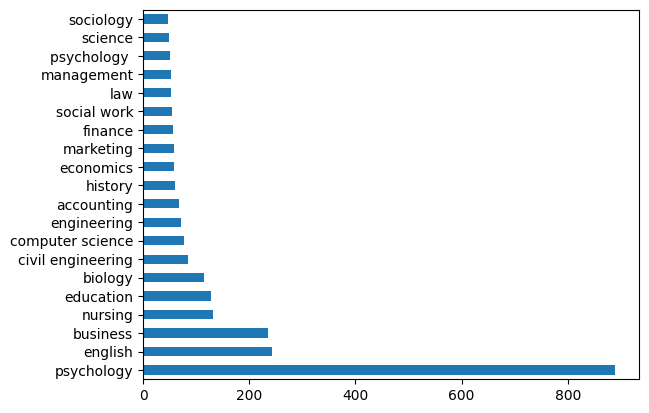

In [74]:
dataset['major'].value_counts()[:20].plot(kind='barh')

<Axes: >

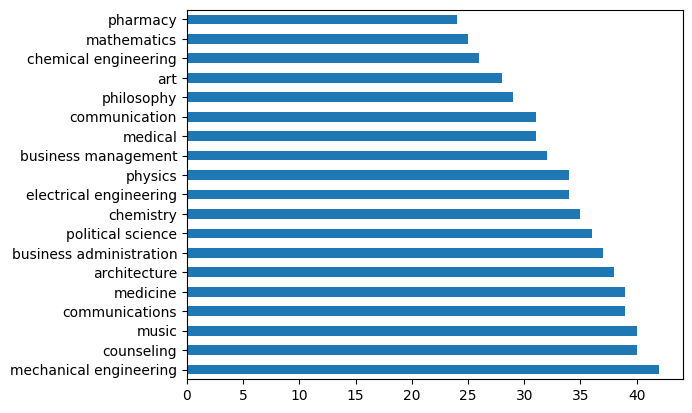

In [75]:
dataset['major'].value_counts()[21:40].plot(kind='barh')

In [76]:
len(dataset['major'].unique())

1479

##relabeling

In [77]:
def relabeling(LabelsDict,dataset):

  listVal = list(LabelsDict.values())
  newlistVal = []
  for ii in range(len(listVal)):
    newlistVal.extend(listVal[ii])

  for i in dataset['major'].index:
    major = str(dataset['major'][i])

    if major not in newlistVal:
      dataset.drop(index=i, inplace=True)
    else:
      if major in LabelsDict ['psychology']:
        #replace value with the key
        dataset.at[i,'major'] = 'psychology'
      elif major in LabelsDict ['social']:
        #replace value with the key
        dataset.at[i,'major'] = 'social'
      elif major in LabelsDict ['education']:
        #replace value with the key
        dataset.at[i,'major'] = 'education'
      elif major in LabelsDict ['arts']:
        #replace value with the key
        dataset.at[i,'major'] = 'arts and literature'
      elif major in LabelsDict ['literature']:
        #replace value with the key
        dataset.at[i,'major'] = 'arts and literature'
      elif major in LabelsDict ['science']:
        #replace value with the key
        dataset.at[i,'major'] = 'science'
      elif major in LabelsDict ['technology']:
        #replace value with the key
        dataset.at[i,'major'] = 'technology'
      elif major in LabelsDict ['economics']:
        #replace value with the key
        dataset.at[i,'major'] = 'economics'
  return dataset


In [78]:
preprocessed = relabeling(manualLabelsDict,dataset)

In [79]:
count_psy = 0
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'psychology':
      count_psy+=1
      if count_psy>1000:
        preprocessed.drop(index=i, inplace=True)

print(count_psy)

890


In [80]:
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'psychology':
      preprocessed.drop(index=i, inplace=True)
      #preprocessed.at[i,'major'] = 'social'

In [81]:
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'education':
      preprocessed.drop(index=i, inplace=True)
      #preprocessed.at[i,'major'] = 'arts and literature'

In [82]:
count_sci = 0
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'science':
      count_sci+=1
      if count_sci>7000:
        preprocessed.drop(index=i, inplace=True)

print(count_sci)

626


In [83]:
count_eco = 0
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'economics':
      count_eco+=1
      if count_eco>7000:
        preprocessed.drop(index=i, inplace=True)

print(count_eco)

607


In [84]:
count_sos = 0
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'social':
      count_sos+=1
      if count_sos>10000:
        preprocessed.drop(index=i, inplace=True)

print(count_sos)

425


In [85]:
print(len(preprocessed['major'].unique()))

5


In [86]:
print(len(preprocessed['major']))

2603


In [87]:
preprocessed.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
1,1,1,2,4,1,2,2,1,5,5,...,5,7,4,7,6,6,4,6,1,science
5,3,5,1,3,1,5,3,4,4,5,...,2,3,5,3,6,7,5,2,1,arts and literature
6,1,4,1,4,1,4,1,2,4,4,...,2,5,5,3,6,2,4,7,2,science
10,1,1,4,2,1,1,1,1,3,3,...,5,7,1,7,5,5,1,7,2,economics
12,5,3,3,3,3,3,3,3,5,5,...,3,7,5,7,1,7,1,6,1,social


<Axes: >

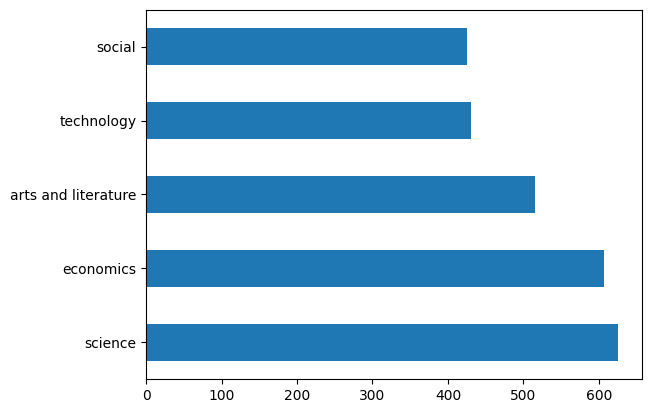

In [88]:
preprocessed['major'].value_counts().plot(kind='barh')

In [89]:
## Run cell ini kalau yakin udah mau save
filename = 'preprocessed_RIASEC_3Class.xlsx'
preprocessed.to_excel(filename)

In [90]:
preprocessed

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
1,1,1,2,4,1,2,2,1,5,5,...,5,7,4,7,6,6,4,6,1,science
5,3,5,1,3,1,5,3,4,4,5,...,2,3,5,3,6,7,5,2,1,arts and literature
6,1,4,1,4,1,4,1,2,4,4,...,2,5,5,3,6,2,4,7,2,science
10,1,1,4,2,1,1,1,1,3,3,...,5,7,1,7,5,5,1,7,2,economics
12,5,3,3,3,3,3,3,3,5,5,...,3,7,5,7,1,7,1,6,1,social
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,3,3,1,1,2,2,2,2,4,2,...,7,7,6,7,7,7,1,7,1,economics
9972,2,3,1,4,1,1,1,1,3,1,...,7,2,2,6,2,6,5,7,1,science
9979,3,4,2,3,4,4,4,4,3,2,...,4,5,4,6,6,5,2,6,3,technology
9983,3,2,1,2,1,2,3,1,4,5,...,5,5,3,7,2,6,4,5,2,economics


# New Data Distribution